<a href="https://colab.research.google.com/github/lmksoehd/ABC_boot_camp/blob/main/08_convolution_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 준비하기

In [29]:
from tensorflow.keras.datasets.fashion_mnist import load_data

# Fashion-MNIST 데이터를 다운받습니다.
(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)

X_train.shape:  (60000, 28, 28)
X_test.shape:  (10000, 28, 28)


## 데이터 전처리



1.   스케일링(범위축소) 0 ~ 1
2.   레이블 범주형 변경


In [30]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [31]:
# 값의 범위를 0 ~ 1로 만들어줍니다.
X_train = X_train / 255
X_test = X_test / 255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [32]:
from tensorflow.keras.utils import to_categorical

# 실제 정답 비교를 위해 0-9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경하는 작업
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print('real_y_test[0]',real_y_test[0])
print('y_test[0]',y_test[0])

real_y_test[0] 9
y_test[0] [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [33]:
from sklearn.model_selection import train_test_split

# 훈련 데이터셋 70, 검증 데이터셋 30

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3, random_state = 7)

In [34]:
print('X_train.shape: ', X_train.shape)
print('X_val.shape: ', X_val.shape)

X_train.shape:  (42000, 28, 28)
X_val.shape:  (18000, 28, 28)


In [35]:
first_model = Sequential()

first_model.add(Flatten(input_shape = (28, 28))) # (28, 28) -> .(28 * 28) -> 1차원 784
first_model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
first_model.add(Dense(32, activation = 'relu')) # 32개의 출력을 가지는 Dense 층
first_model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

##모델 구성하기

In [36]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Conv2D(filters=16, kernel_size=3, strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 7, 7, 16)          2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 16)        

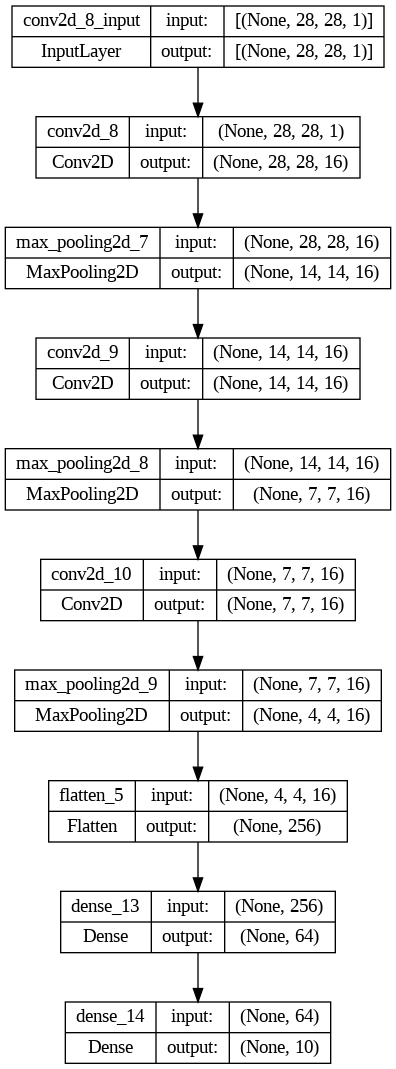

In [37]:
from keras.utils import plot_model

plot_model(model, 'model.png' ,show_shapes=True)

## 모델 학습하기

In [24]:
history = model.fit(X_train, y_train,
          epochs = 30,
          batch_size = 32,
          validation_data = (X_val, y_val))

Epoch 1/30
1313/1313 [==============================] - 21s 7ms/step - loss: 0.6196 - accuracy: 0.7720 - val_loss: 0.4294 - val_accuracy: 0.8454
Epoch 2/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3886 - accuracy: 0.8592 - val_loss: 0.3469 - val_accuracy: 0.8736
Epoch 3/30
1313/1313 [==============================] - 10s 7ms/step - loss: 0.3377 - accuracy: 0.8764 - val_loss: 0.3278 - val_accuracy: 0.8791
Epoch 4/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3045 - accuracy: 0.8895 - val_loss: 0.2976 - val_accuracy: 0.8904
Epoch 5/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2833 - accuracy: 0.8961 - val_loss: 0.2948 - val_accuracy: 0.8923
Epoch 6/30
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2670 - accuracy: 0.9033 - val_loss: 0.2729 - val_accuracy: 0.9002
Epoch 7/30
1313/1313 [==============================] - 9s 7ms/step - loss: 0.2533 - accuracy: 0.9070 - val_loss: 0.2657 - val_accurac

## 학습 결과 분석

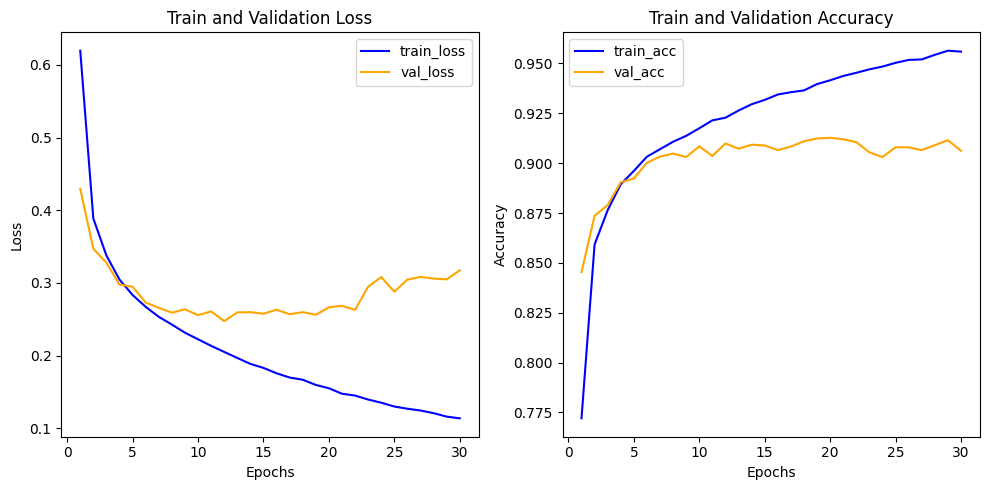

In [28]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()

acc = his_dict['accuracy']  # 혹은 'acc'를 사용
val_acc = his_dict['val_accuracy']  # 혹은 'val_acc'를 사용

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()

plt.tight_layout()  # 그래프 간격 조정
plt.show()

In [27]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3657 - accuracy: 0.9013


[0.36565279960632324, 0.9013000130653381]